In [1]:
%reload_ext autoreload
%autoreload 2

In [26]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from RaTag.workflows.run_construction import *
from RaTag.workflows.timing_estimation import workflow_s1_set, workflow_s2_set
from RaTag.core.datatypes import Run

In [3]:
root_dir = Path('/Volumes/KINGSTON/RaTag_data/RUN17')

In [4]:
run17 = Run(
    root_directory = root_dir,
    run_id = "RUN17",
    el_field = 2375,            # V/cm
    target_isotope = "Th228",
    pressure = 2.0,             # bar
    temperature = 297,          # K
    sampling_rate = 5e9,        # Hz (5 GS/s for FastFrame)
    el_gap = 0.8,               # cm
    drift_gap = 1.4,            # cm
    width_s2 = 20,              # µs
    
    # Calibration constants
    W_value = 22.0,             # eV per e-ion pair (Xe @ 2 bar)
    E_gamma_xray = 11.7e3,      # eV (Ra-224 X-ray energy)
)

In [7]:
run17 = initialize_run(run17)


RUN INITIALIZATION

[1/3] Gas density...
  ✓ Gas density: 4.877e+19 cm⁻³

[2/3] Populating sets...
  Loaded: FieldScan_GasCirculation_Gate0100_Anode2000 - 1361 files (65328 waveforms) [FastFrame (48 frames/file)]
  Loaded: FieldScan_GasCirculation_Gate0100_Anode2000_rep - 83 files (3984 waveforms) [FastFrame (48 frames/file)]
  ✓ Loaded 2 sets

[3/3] Computing fields and transport properties...
  ✓ FieldScan_GasCirculation_Gate0100_Anode2000: Computed and saved to cache
  ✓ FieldScan_GasCirculation_Gate0100_Anode2000_rep: Computed and saved to cache

✓ Run initialization complete


In [8]:
pset = run17.sets[1]
pset.source_dir


PosixPath('/Volumes/KINGSTON/RaTag_data/RUN17/FieldScan_GasCirculation_Gate0100_Anode2000_rep')

In [9]:
pset = workflow_s1_set(pset, max_frames=5000)

  Computing S1...
  Processing 105 files (~5040 frames)
  → t_s1 = -3.28 ± 1.827 µs (from 2252 frames)
    💾 Saved to FieldScan_GasCirculation_Gate0100_Anode2000_rep_s1.npz


In [10]:
pset = workflow_s2_set(pset, max_frames=5000, threshold_s2= 2.0,)

  Computing S2 (expected start: 11.86 µs)...
  Processing 105 files (~5040 frames)
  → t_s2_start = 12.696 ± 1.008 µs (from 3131 frames)
  → t_s2_end = 16.359 ± 2.798 µs (from 3502 frames)
  → s2_duration = 4.021 ± 4.45 µs (from 3046 frames)
    💾 Saved to FieldScan_GasCirculation_Gate0100_Anode2000_rep_s2.npz


In [40]:
path_file_s1 = '/Volumes/KINGSTON/RaTag_data/RUN17/processed_data/FieldScan_GasCirculation_Gate0100_Anode2000_s1.npz'
data = np.load(path_file_s1, allow_pickle=True).items()
data_list = list(data)
ts1 = data_list[0][1]

In [ ]:
path_file_s2 = '/Volumes/KINGSTON/RaTag_data/RUN17/processed_data/FieldScan_GasCirculation_Gate0100_Anode2000_s2.npz'
data = np.load(path_file_s2, allow_pickle=True).items()
data_list = list(data)
ts2 = data_list[0][1]
ts2_end = data_list[1][1]

In [43]:
ts1_cuts = ts1[ts1 > - 14.5]
ts2_cuts = ts2[ts2 > 15.0]
ts2_end_cuts = ts2_end[ts2_end > 15]

[Text(0.5, 0, 'Event number (every 50th event)'),
 Text(0, 0.5, 'S2 time (µs)'),
 Text(0.5, 1.0, 'S2 times during gas circulation')]

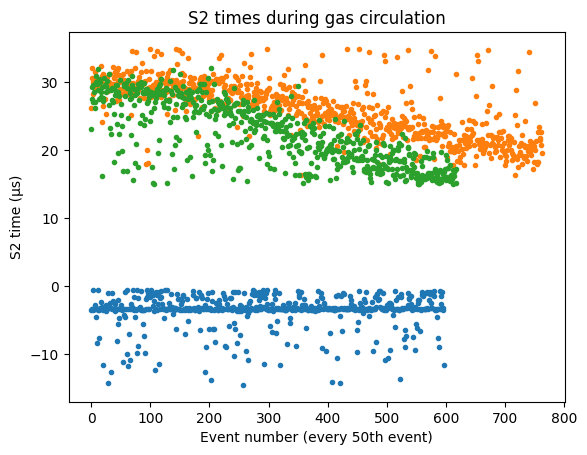

In [49]:
from matplotlib.pyplot import xlabel

plt.plot(ts1_cuts[::30], '.', label='S1')
plt.plot(ts2_end_cuts[::50], '.', label='S2 end')
plt.plot(ts2_cuts[::50], '.', label='S2 start')
plt.gca().set(xlabel='Event number (every 50th event)', ylabel='S2 time (µs)', title='S2 times during gas circulation')

In [11]:
path_file_s1 = '/Volumes/KINGSTON/RaTag_data/RUN17/processed_data/FieldScan_GasCirculation_Gate0100_Anode2000_rep_s1.npz'
data = np.load(path_file_s1, allow_pickle=True).items()
data_list = list(data)
ts1_rep = data_list[0][1]

In [12]:
path_file_s2 = '/Volumes/KINGSTON/RaTag_data/RUN17/processed_data/FieldScan_GasCirculation_Gate0100_Anode2000_rep_s2.npz'
data = np.load(path_file_s2, allow_pickle=True).items()
data_list = list(data)
ts2_rep = data_list[0][1]
ts2_end_rep = data_list[1][1]

In [20]:
ts1_cuts_rep = ts1_rep[ts1_rep > - 14.5]
ts2_cuts_rep = ts2_rep[ts2_rep > 5.0]
ts2_end_cuts_rep = ts2_end_rep[ts2_end_rep > 15]

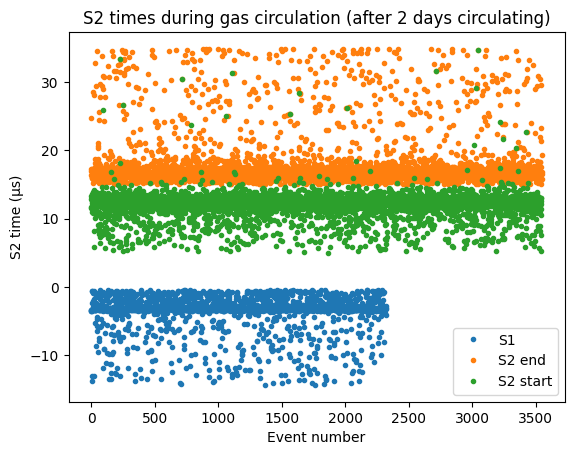

In [25]:
from matplotlib.pyplot import xlabel

plt.plot(ts1_cuts_rep, '.', label='S1')
plt.plot(ts2_end_cuts_rep, '.', label='S2 end')
plt.plot(ts2_cuts_rep, '.', label='S2 start')
plt.gca().set(xlabel='Event number', ylabel='S2 time (µs)', title='S2 times during gas circulation (after 2 days circulating)')
plt.legend()